In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dados = pd.read_csv('disaster-events new.csv')

In [3]:
dados

,Entity,Year,Disasters
0,All disasters,1900,6
1,All disasters excluding earthquakes,1900,5
2,All disasters excluding extreme temperature,1900,6
3,Drought,1900,2
4,Earthquake,1900,1
...,...,...,...
1139,Extreme weather,2024,24
1140,Flood,2024,31
1141,Volcanic activity,2024,1
1142,Wet mass movement,2024,7


In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Entity     1144 non-null   object
 1   Year       1144 non-null   int64 
 2   Disasters  1144 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 26.9+ KB


In [14]:
dados['Entity'].unique()

array(['All disasters', 'All disasters excluding earthquakes',
       'All disasters excluding extreme temperature', 'Drought',
       'Earthquake', 'Extreme weather', 'Flood', 'Volcanic activity',
       'Dry mass movement', 'Wet mass movement', 'Wildfire',
       'Extreme temperature', 'Fog', 'Glacial lake outburst flood'],
      dtype=object)

In [22]:
dados.groupby('Entity')

In [16]:
dados.groupby('Entity').get_group('Extreme weather')

,Entity,Year,Disasters
5,Extreme weather,1900,1
15,Extreme weather,1902,1
23,Extreme weather,1903,2
30,Extreme weather,1904,1
36,Extreme weather,1905,1
...,...,...,...
1092,Extreme weather,2020,126
1103,Extreme weather,2021,121
1115,Extreme weather,2022,109
1127,Extreme weather,2023,140


In [23]:
qtd_desastres_por_tipo = dados.groupby('Entity')[['Disasters']].sum()
qtd_desastres_por_tipo

,Disasters
Entity,
All disasters,16162
All disasters excluding earthquakes,14544
All disasters excluding extreme temperature,15468
Drought,1400
Dry mass movement,45
Earthquake,1618
Extreme temperature,694
Extreme weather,4765
Flood,6044


In [24]:
qtd_desastres_por_ano = dados.groupby('Year')[['Disasters']].sum()
qtd_desastres_por_ano

,Disasters
Year,
1900,23
1901,3
1902,36
1903,43
1904,13
...,...
2020,1606
2021,1733
2022,1689


In [49]:
tipo_de_desastre_por_ano = dados.groupby(['Entity', 'Year'])[['Disasters']].sum().reset_index()


,Entity,Year,Disasters
0,All disasters,1900,6
1,All disasters,1901,1
2,All disasters,1902,10
3,All disasters,1903,12
4,All disasters,1904,4
...,...,...,...
1139,Wildfire,2020,10
1140,Wildfire,2021,19
1141,Wildfire,2022,16
1142,Wildfire,2023,16


In [61]:
pivot = tipo_de_desastre_por_ano.pivot_table(index = 'Entity', columns ='Year', values = 'Disasters').fillna(0)
pivot

Year,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Entity,,,,,,,,,,,,,,,,,,,,,
All disasters,6.0,1.0,10.0,12.0,4.0,7.0,13.0,4.0,3.0,15.0,...,404.0,349.0,364.0,323.0,413.0,407.0,441.0,440.0,410.0,83.0
All disasters excluding earthquakes,5.0,0.0,6.0,7.0,1.0,2.0,7.0,1.0,1.0,7.0,...,381.0,319.0,342.0,303.0,382.0,391.0,413.0,409.0,378.0,77.0
All disasters excluding extreme temperature,6.0,1.0,10.0,12.0,4.0,7.0,13.0,4.0,3.0,15.0,...,390.0,336.0,353.0,296.0,390.0,401.0,438.0,400.0,400.0,81.0
Drought,2.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,39.0,32.0,28.0,20.0,28.0,20.0,25.0,40.0,17.0,7.0
Dry mass movement,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Earthquake,1.0,1.0,4.0,5.0,3.0,5.0,6.0,3.0,2.0,8.0,...,23.0,30.0,22.0,20.0,31.0,16.0,28.0,31.0,32.0,6.0
Extreme temperature,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14.0,13.0,11.0,27.0,23.0,6.0,3.0,40.0,10.0,2.0
Extreme weather,1.0,0.0,1.0,2.0,1.0,1.0,3.0,0.0,0.0,5.0,...,121.0,86.0,131.0,96.0,92.0,126.0,121.0,109.0,140.0,24.0
Flood,1.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,1.0,...,166.0,164.0,129.0,128.0,195.0,206.0,222.0,181.0,166.0,31.0


In [63]:
pivot2 = tipo_de_desastre_por_ano.pivot_table(index =  'Year', columns ='Entity', values = 'Disasters').fillna(0)
new_table

Entity,All disasters,All disasters excluding earthquakes,All disasters excluding extreme temperature,Drought,Dry mass movement,Earthquake,Extreme temperature,Extreme weather,Flood,Fog,Glacial lake outburst flood,Volcanic activity,Wet mass movement,Wildfire
Year,,,,,,,,,,,,,,
1900,6.0,5.0,6.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1901,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1902,10.0,6.0,10.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,5.0,0.0,0.0
1903,12.0,7.0,12.0,1.0,1.0,5.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0
1904,4.0,1.0,4.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,407.0,391.0,401.0,20.0,0.0,16.0,6.0,126.0,206.0,0.0,0.0,4.0,19.0,10.0
2021,441.0,413.0,438.0,25.0,0.0,28.0,3.0,121.0,222.0,0.0,2.0,9.0,12.0,19.0
2022,440.0,409.0,400.0,40.0,0.0,31.0,40.0,109.0,181.0,0.0,1.0,5.0,17.0,16.0


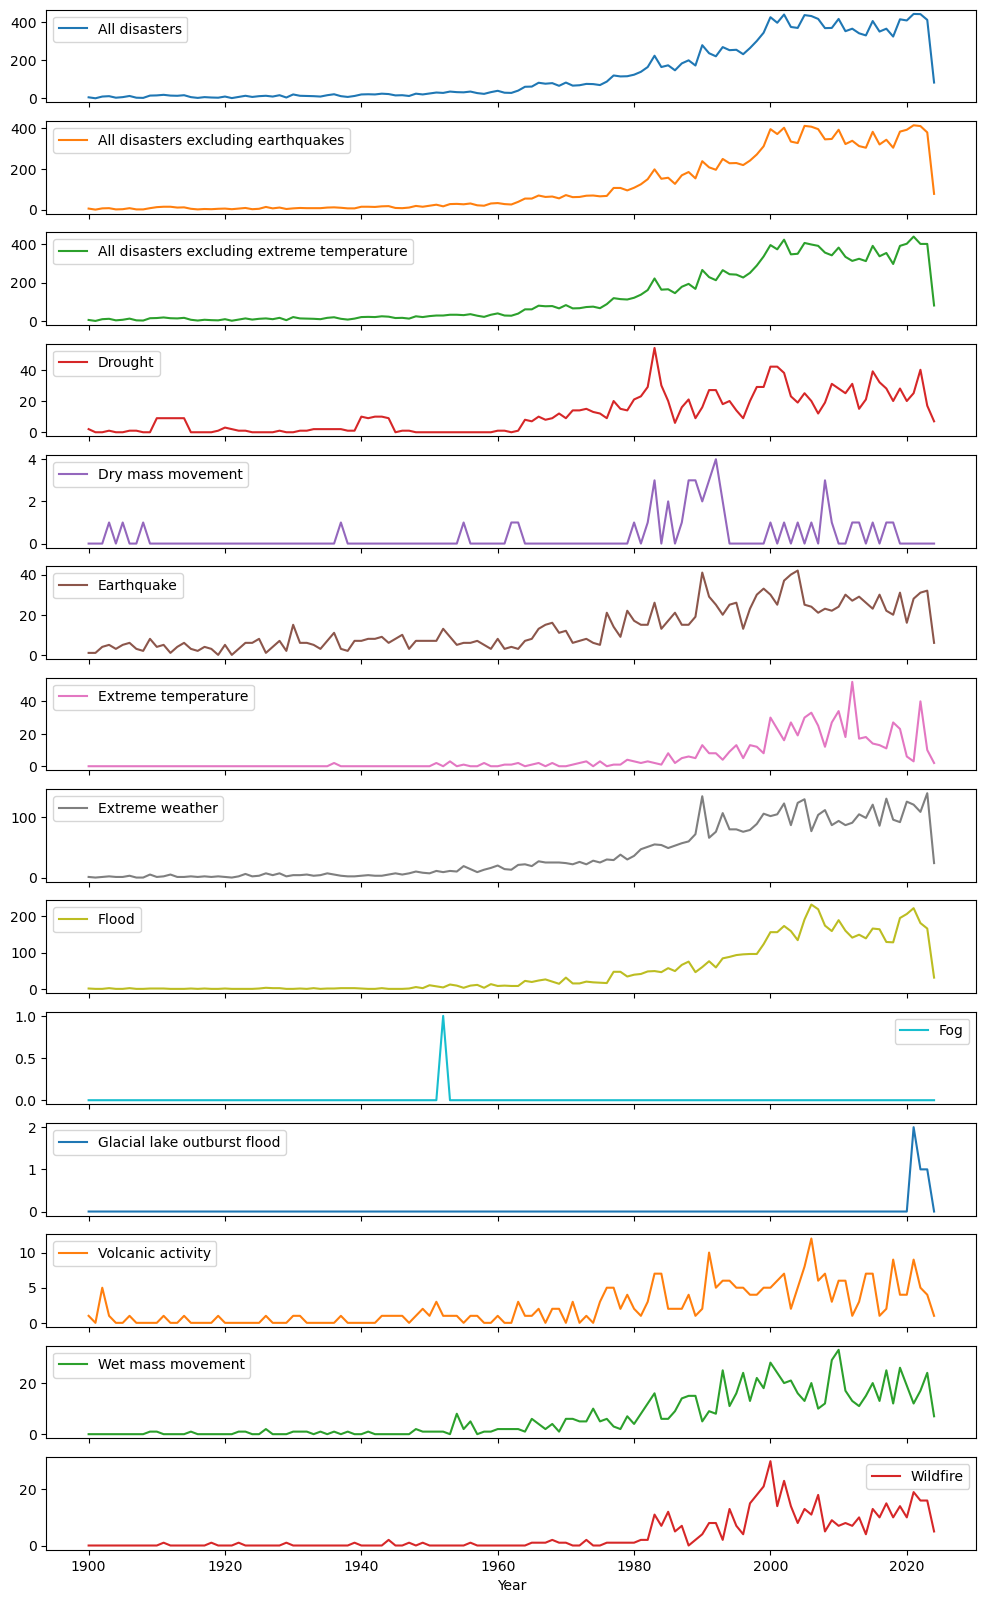

In [65]:
grafico_tipo_de_desastre_por_ano = pivot2.plot( subplots = True, figsize = (12,20) )

In [102]:
years =  list(map(int, range(1900, 2024)))
years

[1900,
 1901,
 1902,
 1903,
 1904,
 1905,
 1906,
 1907,
 1908,
 1909,
 1910,
 1911,
 1912,
 1913,
 1914,
 1915,
 1916,
 1917,
 1918,
 1919,
 1920,
 1921,
 1922,
 1923,
 1924,
 1925,
 1926,
 1927,
 1928,
 1929,
 1930,
 1931,
 1932,
 1933,
 1934,
 1935,
 1936,
 1937,
 1938,
 1939,
 1940,
 1941,
 1942,
 1943,
 1944,
 1945,
 1946,
 1947,
 1948,
 1949,
 1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022,
 2023]

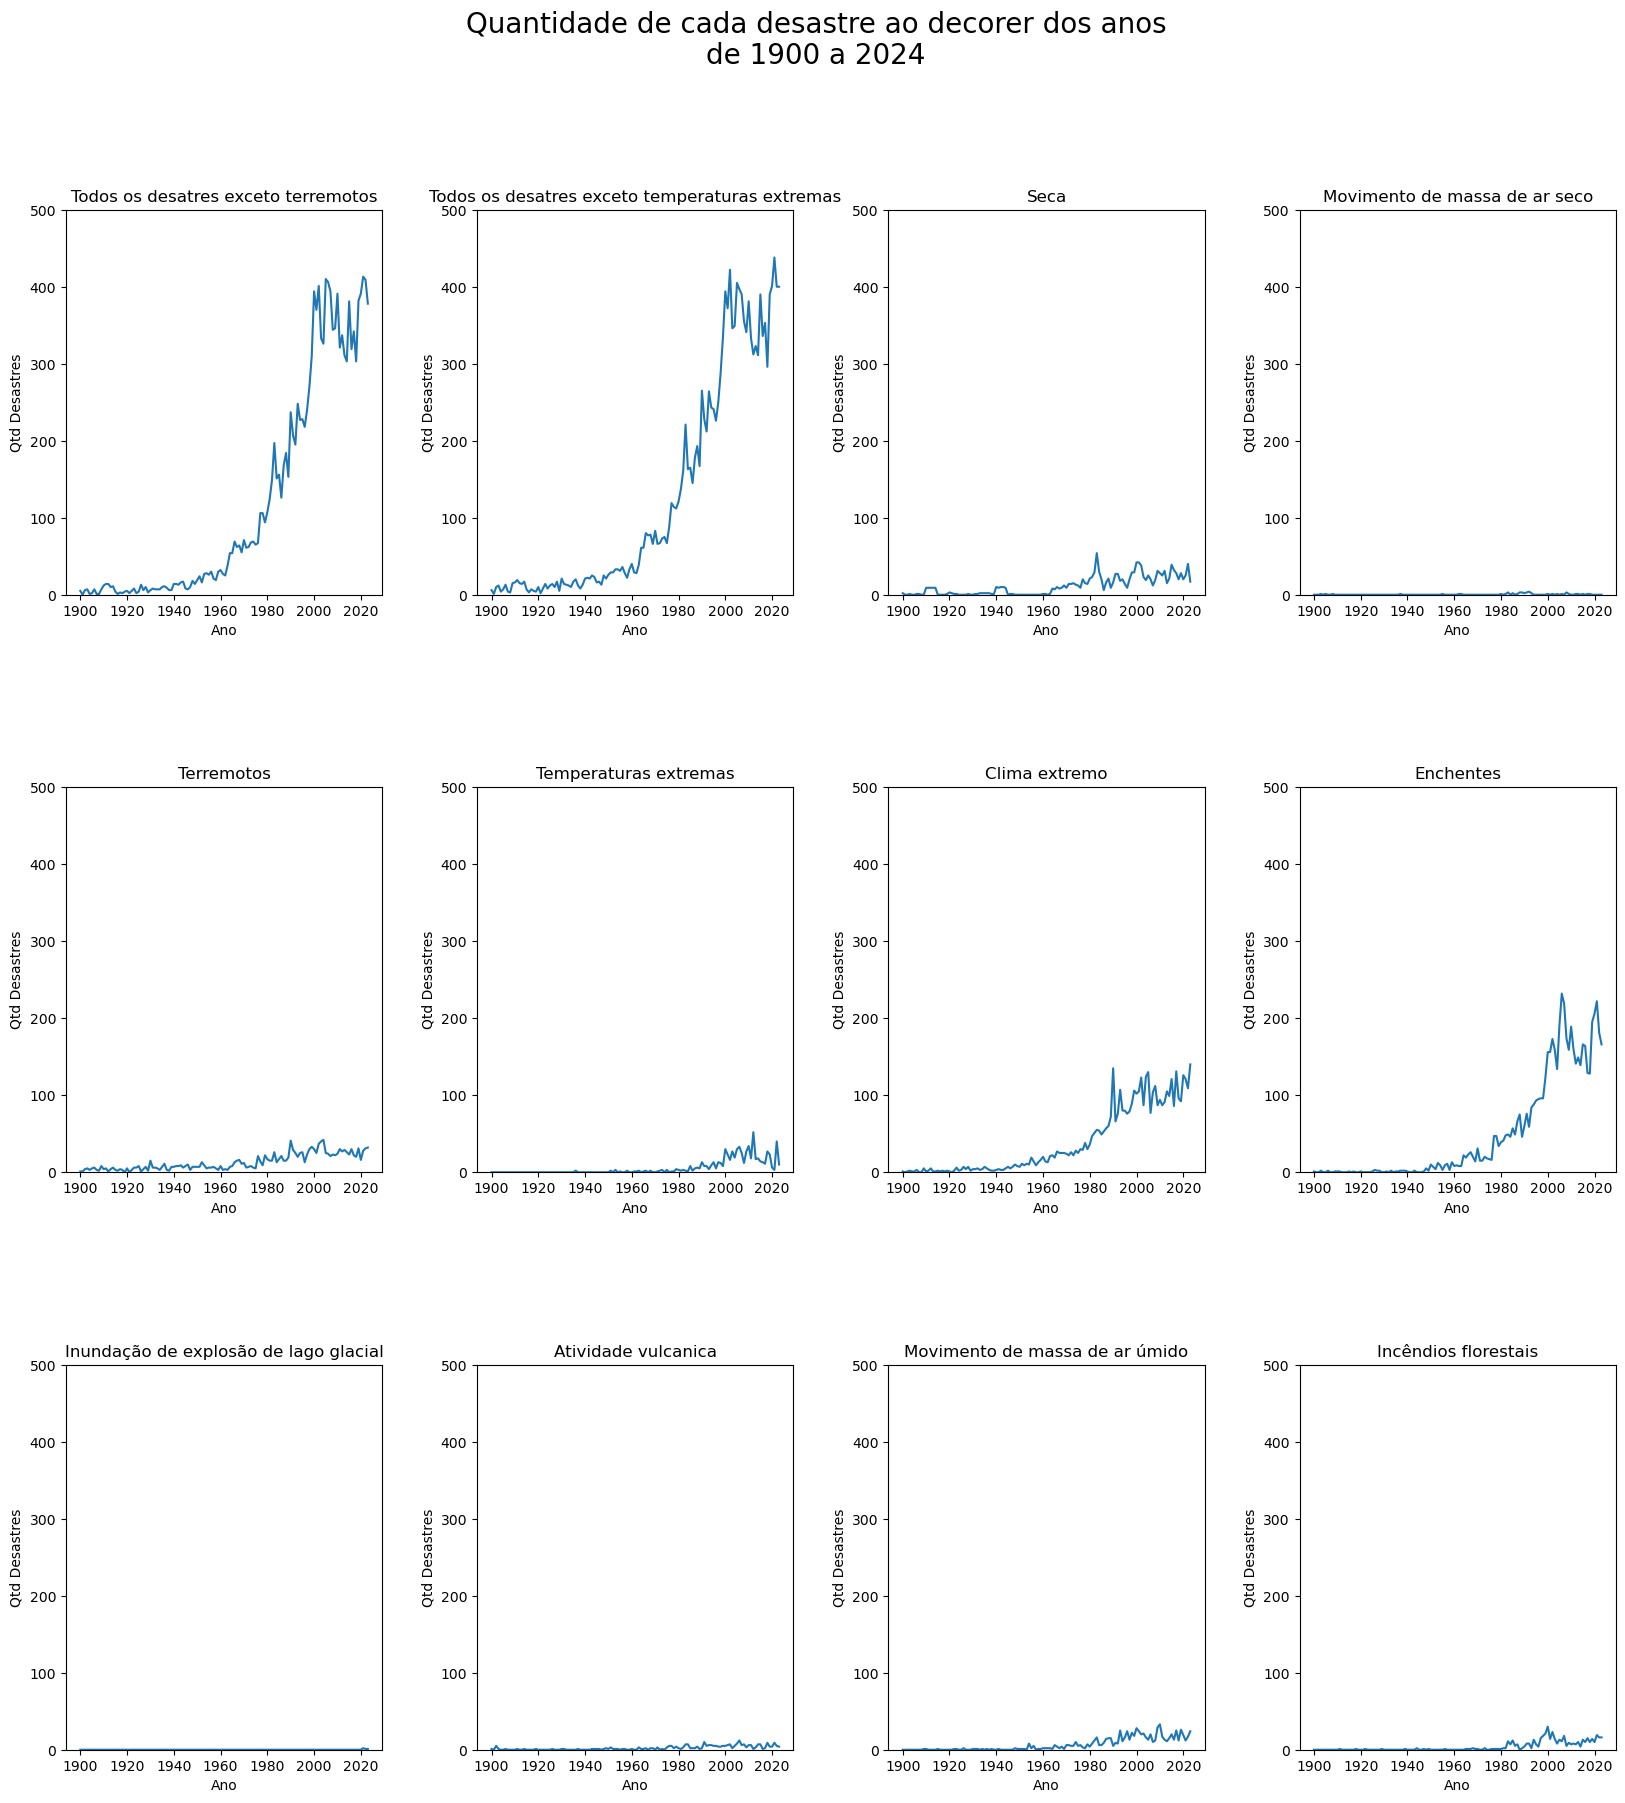

In [113]:
fig, axs = plt.subplots(3, 4, figsize=(20,20))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
fig.suptitle('Quantidade de cada desastre ao decorer dos anos\nde 1900 a 2024', fontsize = 20)

axs[0,0].plot(pivot.loc['All disasters excluding earthquakes', years])
axs[0,0].set_title('Todos os desatres exceto terremotos')

axs[0,1].plot(pivot.loc['All disasters excluding extreme temperature', years])
axs[0,1].set_title('Todos os desatres exceto temperaturas extremas')

axs[0,2].plot(pivot.loc['Drought', years])
axs[0,2].set_title('Seca')
              
axs[0,3].plot(pivot.loc['Dry mass movement', years])
axs[0,3].set_title('Movimento de massa de ar seco')

axs[1,0].plot(pivot.loc['Earthquake', years])
axs[1,0].set_title('Terremotos')

axs[1,1].plot(pivot.loc['Extreme temperature', years])
axs[1,1].set_title('Temperaturas extremas')

axs[1,2].plot(pivot.loc['Extreme weather', years]) 
axs[1,2].set_title('Clima extremo')

axs[1,3].plot(pivot.loc['Flood', years])
axs[1,3].set_title('Enchentes')

axs[2,0].plot(pivot.loc['Glacial lake outburst flood', years])
axs[2,0].set_title('Inundação de explosão de lago glacial')

axs[2,1].plot(pivot.loc['Volcanic activity', years])
axs[2,1].set_title('Atividade vulcanica')

axs[2,2].plot(pivot.loc['Wet mass movement', years]) 
axs[2,2].set_title('Movimento de massa de ar úmido')

axs[2,3].plot(pivot.loc['Wildfire', years])
axs[2,3].set_title('Incêndios florestais')

              
for ax in axs.flat:
  ax.xaxis.set_major_locator(plt.MultipleLocator(20))

for ax in axs.flat:
  ax.set_xlabel('Ano')
  ax.set_ylabel('Qtd Desastres')

ymin = 0
ymax = 500

for ax in axs.ravel():
  ax.set_ylim(ymin, ymax)


plt.show()
                        

In [110]:
desastres_totais = pivot.loc['All disasters', years]
desastres_totais_dict = {'Year': desastres_totais.index.tolist(), 'Disasters': desastres_totais.values.tolist()}
dados_desastres_totais = pd.DataFrame(desastres_totais_dict)
dados_desastres_totais

,Year,Disasters
0,1900,6.0
1,1901,1.0
2,1902,10.0
3,1903,12.0
4,1904,4.0
...,...,...
119,2019,413.0
120,2020,407.0
121,2021,441.0
122,2022,440.0


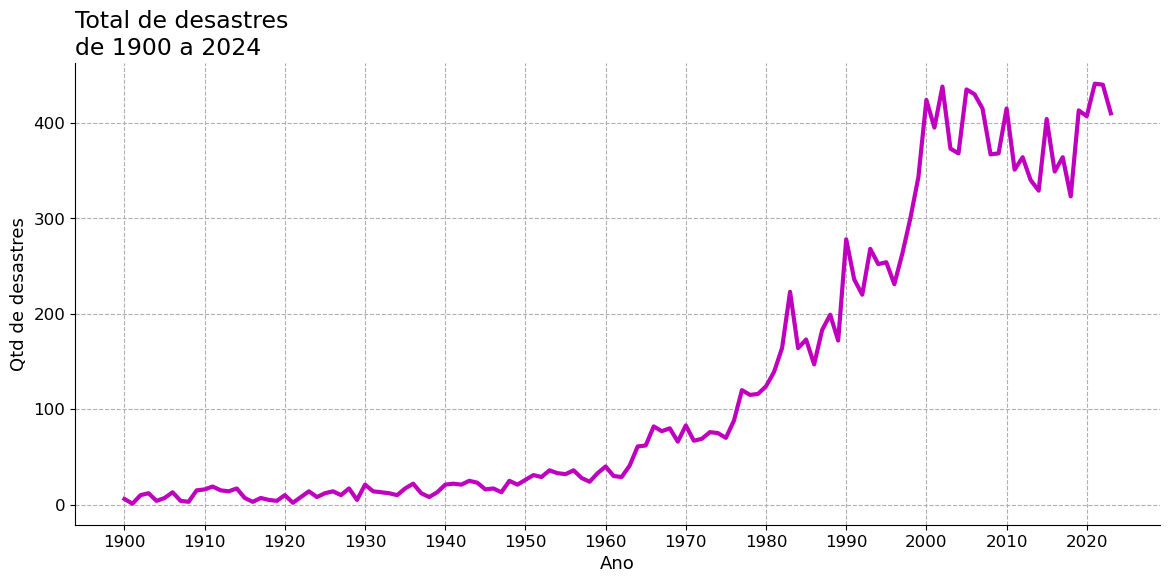

In [116]:
fig, ax = plt.subplots(figsize = (14,6))
ax.plot(dados_desastres_totais['Year'], dados_desastres_totais['Disasters'], lw = 3, color = 'm')
ax.set_title('Total de desastres\nde 1900 a 2024', fontsize = 17, loc = 'left')

ax.set_xlabel('Ano', fontsize = 13)
ax.set_ylabel('Qtd de desastres', fontsize = 13)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

ax.xaxis.set_major_locator(plt.MultipleLocator(10))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


fig.savefig('desastres_totais_de_1900_2024.png', transparent = False, dpi = 300, bbox_inches = 'tight')

plt.grid(linestyle='--')

plt.show()